In [154]:
# import relevant libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import plotly.express as px
import math

import warnings

In [27]:
# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [28]:
# read clean Open 2019 dataset
df_19 = pd.read_csv('./data/2019_opens_clean.csv')

In [29]:
df_19 = df_19.loc[:, ~df_19.columns.str.contains('^Unnamed')]

In [30]:
df_19.shape

(338538, 76)

In [31]:
df_19.head()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI
0,86,Justin,Bergh,M,United States,19273,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men (35-39),15232,58534,59298,85576,86308,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,152.0,152.0,8.00,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,1.09,465.0,135.0,75.0,60.0,2.36,26.567055
1,88,Cary,Hair,M,United States,625,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,900.0,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,171.0,153.0,8.53,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,1.77,215.0,210.0,105.0,105.0,5.00,25.871182
2,92,Tim,Chan,M,United States,20635,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men (45-49),155079,102548,127946,76177,103179,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,95.0,76.0,4.50,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,1.17,470.0,109.0,60.0,49.0,1.80,25.875142
3,93,Leif,Edmundson,M,United States,19273,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men (35-39),50223,39468,78855,40425,28827,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,134.0,133.0,7.03,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,1.47,248.0,201.0,105.0,96.0,4.50,27.767327
4,1617,John,Mclaughlin,M,United States,4896,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men (50-54),12686,26138,26923,13629,10479,900.0,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,156.0,152.0,8.11,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,1.77,238.0,210.0,105.0,105.0,5.00,26.770610


### Check overallscore and division

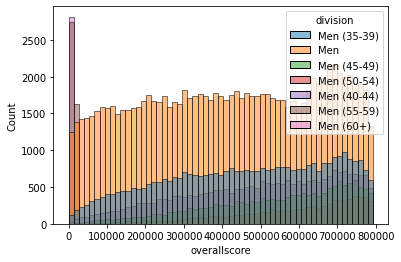

In [32]:
sns.histplot(data=df_19[df_19['gender']=='M'],x='overallscore',hue='division');

Some higher age divisions are counted just as division and not as overall. In the following the overallscore, overallrank, scores and ranks should be handled without higher ages divisions.

## Amount of Competitors

The total amount of competitors who competed at minimum one workout: 338,538

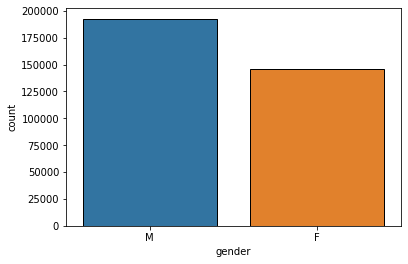

In [69]:
sns.countplot(data=df_19,x='gender',edgecolor='black');

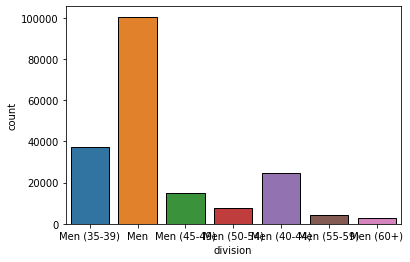

In [68]:
sns.countplot(data=df_19[df_19['gender']=='M'],x='division',edgecolor='black');

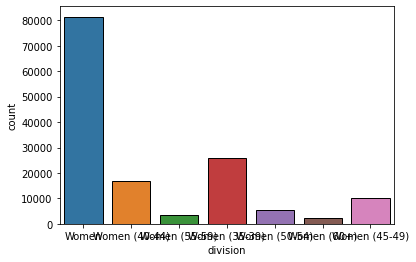

In [67]:
sns.countplot(data=df_19[df_19['gender']=='F'],x='division',edgecolor='black');

In [58]:
df_19.groupby('countryoforiginname')['gender'].value_counts()

countryoforiginname  gender
Afghanistan          M          9
Albania              F          1
                     M          1
Algeria              M         15
                     F          1
                               ..
Yemen                M          1
Zambia               M         21
                     F         14
Zimbabwe             M         79
                     F         47
Name: gender, Length: 288, dtype: int64

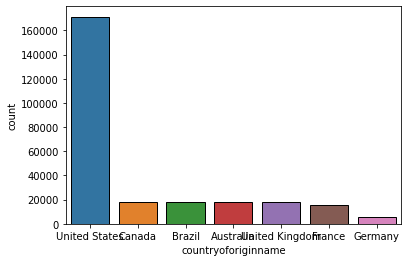

In [72]:
sns.countplot(
    data=df_19,
    x="countryoforiginname",
    #hue="gender",
    #palette={"failed": "hotpink", "successful": "lime"},
    order=df_19.countryoforiginname.value_counts().iloc[:7].index,
    edgecolor='black'
);

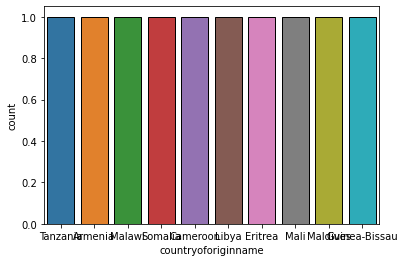

In [79]:
sns.countplot(
    data=df_19,
    x="countryoforiginname",
    #hue="gender",
    #palette={"failed": "hotpink", "successful": "lime"},
    order=df_19.countryoforiginname.value_counts().iloc[-10:].index,
    edgecolor='black'
);

In [42]:
map_dictionary ={
    'United States' : 'USA',
    'Bahamas' : 'America',
    'New Zealand' : 'Oceania',
    'Canada' : 'Canada',
    'Russian Federation' : 'Europe',
    'Kenya' : 'Africa',
    'Australia' : 'Oceania',
    'Costa Rica' : 'America',
    'Denmark' : 'Europe',
    'United Kingdom' : 'Europe',
    'Sweden' : 'Europe',
    'Netherlands' : 'Europe',
    'France' : 'Europe',
    'Ireland' : 'Europe',
    'Switzerland' : 'Europe',
    'South Africa' : 'Africa',
    'Germany' : 'Europe',
    'Argentina' : 'America',
    'Italy' : 'Europe',
    'Norway' : 'Europe',
    'Iceland' : 'Europe',
    'Zimbabwe' : 'Africa',
    'Peru' : 'America',
    'Portugal' : 'Europe',
    'Korea, Republic of' : 'Asia',
    'Philippines' : 'Asia',
    'Colombia' : 'America',
    'Mexico' : 'America',
    'Singapore' : 'Asia',
    'Chile' : 'America',
    'Israel' : 'Asia',
    'Brazil' : 'America',
    'Ukraine' : 'Europe',
    'Spain' : 'Europe',
    'Ecuador' : 'America',
    'United Arab Emirates' : 'Asia',
    'Slovenia' : 'Europe',
    'Turkey' : 'Asia',
    'China' : 'Asia',
    'Jamaica' : 'America',
    'Bahrain' : 'Asia',
    'Czech Republic' : 'Europe',
    'Malaysia' : 'Asia',
    'Egypt' : 'Africa',
    'Hungary' : 'Europe',
    'Indonesia' : 'Asia',
    'Finland' : 'Europe',
    'Angola' : 'Africa',
    'Tonga' : 'Oceania',
    'Trinidad and Tobago' : 'America',
    'Belgium' : 'Europe',
    'Brunei Darussalam' : 'Asia',
    'Afghanistan' : 'Asia',
    'Austria' : 'Europe',
    'Croatia' : 'Europe',
    'Latvia' : 'Europe',
    'India' : 'Asia',
    'Malta' : 'Europe',
    'Bulgaria' : 'Europe',
    'Thailand' : 'Asia',
    'Morocco' : 'Africa',
    'Greece' : 'Europe',
    'Iran' : 'Asia',
    'Japan' : 'Asia',
    'Dominican Republic' : 'America',
    'Barbados' : 'America',
    'Honduras' : 'America',
    'Guatemala' : 'America',
    'Panama' : 'America',
    'Samoa' : 'America',
    'Venezuela' : 'America',
    'Iraq' : 'Asia',
    'Slovakia' : 'Europe',
    'Viet Nam' : 'Asia',
    'Romania' : 'Europe',
    'Lebanon' : 'Asia',
    'Poland' : 'Europe',
    'Belarus' : 'Europe',
    'Sri Lanka' : 'Asia',
    'Kuwait' : 'Asia',
    'Palestinian Territory' : 'Asia',
    'Namibia' : 'Africa',
    'Estonia' : 'Europe',
    'Tunisia' : 'Africa',
    'Bolivia' : 'America',
    'Saudi Arabia' : 'Asia',
    'Luxembourg' : 'Europe',
    'Nigeria' : 'Africa',
    'Papua New Guinea' : 'Oceania',
    'Zambia' : 'Africa',
    'El Salvador' : 'America',
    'Serbia' : 'Europe',
    'Oman' : 'Asia',
    'Macedonia' : 'Europe',
    'Guyana' : 'America',
    'Tanzania' : 'Africa',
    'Fiji' : 'Oceania',
    'Andorra' : 'Europe',
    'Cyprus' : 'Europe',
    'Nicaragua' : 'America',
    'Belize' : 'America',
    'Jordan' : 'Asia',
    'Qatar' : 'Asia',
    'Uruguay' : 'America',
    'Lithuania' : 'Europe',
    'Montenegro' : 'Europe',
    'Uganda' : 'Africa',
    'Paraguay' : 'America',
    'Madagascar' : 'Africa',
    'Kazakhstan' : 'Asia',
    'Cambodia' : 'Asia',
    'San Marino' : 'Europe',
    'Mauritius' : 'America',
    'Algeria' : 'Africa',
    'Suriname' : 'America',
    'Saint Vincent/Grenadines' : 'America',
    'Bosnia and Herzegovina' : 'Europe',
    'Congo, The Republic of' : 'Africa',
    'Libya' : 'Africa',
    'Pakistan' : 'Asia',
    'Mozambique' : 'Africa',
    'Liechtenstein' : 'Europe',
    'Moldova' : 'Europe',
    'Syrian Arab Republic' : 'Asia',
    'Kyrgyzstan' : 'Asia',
    'Saint Lucia' : 'America',
    'Uzbekistan' : 'Asia',
    'Azerbaijan' : 'Asia',
    'Senegal' : 'Africa',
    'Congo, The Democratic Republic of the' : 'America',
    'Mongolia' : 'Asia',
    'Kosovo' : 'Europe',
    'Botswana' : 'Africa',
    'Djibouti' : 'Africa',
    'Armenia' : 'Asia',
    'Georgia' : 'Asia',
    'Somalia' : 'Africa',
    'Vanuatu' : 'Oceania',
    "Côte d'Ivoire" : 'Africa',
    'Ghana' : 'Africa',
    'Antigua and Barbuda' : 'America',
    'Tajikistan' : 'Asia',
    'Nepal' : 'Asia',
    'Yemen' : 'Asia',
    'Rwanda' : 'Africa',
    'Tuvalu' : 'Oceania',
    'Myanmar' : 'Asia',
    'Guinea-Bissau' : 'Africa',
    'Maldives' : 'Asia',
    'Eritrea' : 'Africa',
    'Niger' : 'Africa',
    'Albania' : 'Europe',
    'Cameroon' : 'Africa',
    'Mali' : 'Africa',
    'Malawi' : 'Africa',
    'Bangladesh' : 'Asia'
    }

In [43]:
df_19['region']  = df_19['countryoforiginname'].map(map_dictionary)

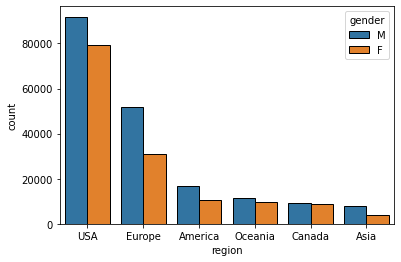

In [81]:
sns.countplot(
    data=df_19,
    x='region',
    hue='gender',
    order=df_19.region.value_counts().iloc[:6].index,
    edgecolor='black'
);

# Workout Analyses

### Workout 19.1

AMRAP'15: 19 Wallball Shots / 19 Calories Row

Rx:
* Men: 20lb medball to 10ft target
* Women: 14lb medball to 9ft target

Scaling:
* Men: 14lb medball to 10ft target
* Women: 10lb medball to 9ft target

Score: total number of reps/cals

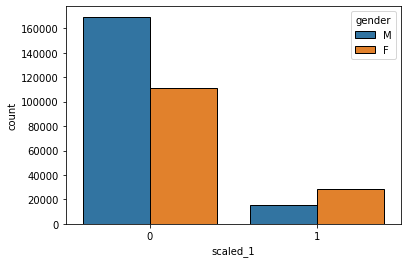

In [84]:
sns.countplot(
    data=df_19[df_19['score_1']!=0],
    x="scaled_1",
    hue="gender",
    edgecolor='black'
);

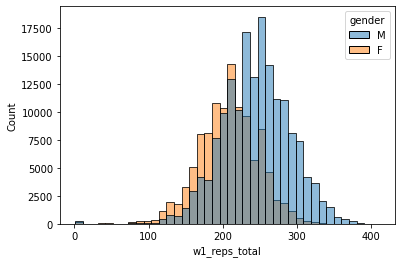

In [92]:
sns.histplot(data=df_19[df_19['scaled_1']==0],x='w1_reps_total',hue='gender',bins=40);

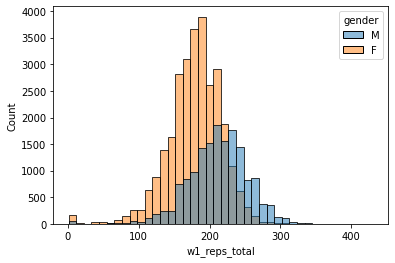

In [93]:
sns.histplot(data=df_19[df_19['scaled_1']==1],x='w1_reps_total',hue='gender',bins=40);

In [119]:
df_19[(df_19['gender']=='M') & (df_19['scaled_1']==0)]['w1_reps_total'].describe()

count    169428.000000
mean        244.196597
std          45.783445
min           1.000000
25%         213.000000
50%         245.000000
75%         275.000000
max         411.000000
Name: w1_reps_total, dtype: float64

In [120]:
df_19[(df_19['gender']=='F') & (df_19['scaled_1']==0)]['w1_reps_total'].describe()

count    111346.000000
mean        207.197259
std          40.143962
min           1.000000
25%         182.000000
50%         209.000000
75%         232.000000
max         366.000000
Name: w1_reps_total, dtype: float64

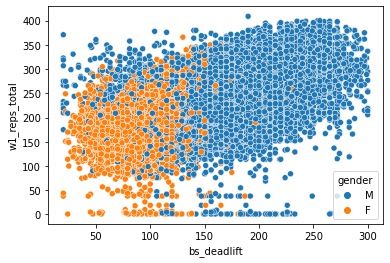

In [128]:
sns.scatterplot(data=df_19,x='bs_deadlift',y='w1_reps_total',hue='gender');

In [138]:
# create new feature: top_bs_deadlift
bs_deadlift_list = df_19['bs_deadlift'].to_list()
top_bs_deadlift = []
for i in bs_deadlift_list:
    if i >= 20 and i < 100:
        top_bs_deadlift.append('A: 20-100')
    elif i >= 100 and i < 200:
        top_bs_deadlift.append('B: 100-200')
    elif i >= 200 and i <= 300:
        top_bs_deadlift.append('C: 200-300')
    else:
        top_bs_deadlift.append(np.NaN)
df_19['top_bs_deadlift'] = top_bs_deadlift

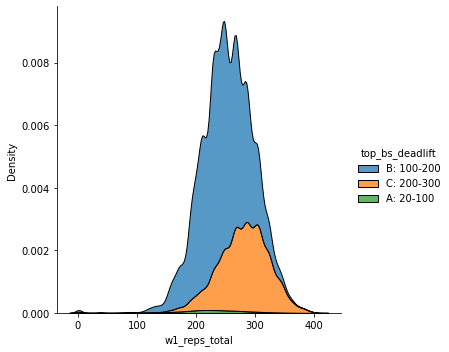

In [139]:
sns.displot(data=df_19[(df_19['gender']=='M') & (df_19['scaled_1']==0)],x='w1_reps_total',hue='top_bs_deadlift',kind='kde',multiple='stack');

### Workout 19.2

For time:
* AMRAP'8: 25 T2B / 50 DU / 15 Squat-Clean / 25 T2B / 50 DU / 13 Squat-Clean
* AMRAP'4 (if completed before 8 minutes): 25 T2B / 50 DU / 11 Squat-Clean
* AMRAP'4 (if completed before 12 minutes): 25 T2B / 50 DU / 9 Squat-Clean
* AMRAP'4 (if completed before 16 minutes): 25 T2B / 50 DU / 7 Squat-Clean

Rx:
* Men: Squat-Clean ladder 135-185-225-275-315 lb
* Women: Squat-Clean ladder 85-115-145-175-205 lb

Scaled:
* Men:
  - Squat-Clean ladder 95-115-135-155-185 lb
  - Hanging Knee Raises instead of Toes-2-Bar
  - Single Unders instead of Double Unders
* Women:
  - Squat-Clean ladder 55-75-95-115-135 lb
  - Hanging Knee Raises instead of Toes-2-Bar
  - Single Unders instead of Double Unders

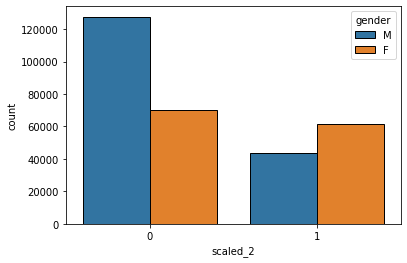

In [85]:
sns.countplot(
    data=df_19[df_19['score_2']!=0],
    x="scaled_2",
    hue="gender",
    edgecolor='black'
);

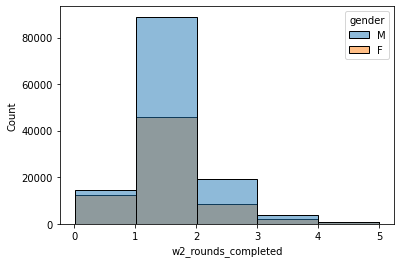

In [149]:
sns.histplot(data=df_19[df_19['scaled_2']==0],x='w2_rounds_completed',hue='gender',bins=5);

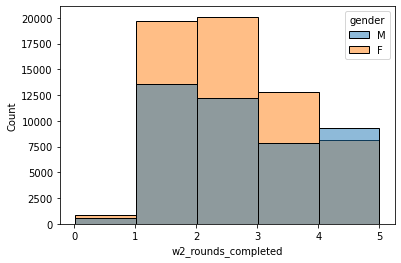

In [150]:
sns.histplot(data=df_19[df_19['scaled_2']==1],x='w2_rounds_completed',hue='gender',bins=5);

In [155]:
# create new feature: w2_full_rounds_completed
w2_full_rounds_completed_list = df_19['w2_rounds_completed'].to_list()
w2_full_rounds_completed = []
for i in w2_full_rounds_completed_list:
    if i < 2.0:
        w2_full_rounds_completed.append('<  8 min')
    elif i >= 2.0 and i < 3.0:
        w2_full_rounds_completed.append('< 12 min')
    elif i >= 3.0 and i < 4.0:
        w2_full_rounds_completed.append('< 16 min')
    elif i >= 4.0 and i < 5.0:
        w2_full_rounds_completed.append('< 20 min')
    elif i == 5.0:
        w2_full_rounds_completed.append('full WOD')
    else:
        w2_full_rounds_completed.append(np.NaN)
df_19['w2_full_rounds_completed'] = w2_full_rounds_completed

In [ ]:
data = dict(Quantity=[80, 73, 58, 42, 23,
                      180, 120, 82, 51, 33,
                      109, 78, 62, 44, 22],
    
            w2_status=['<  8 min', '< 12 min', '< 16 min',
                   '< 20 min', 'full WOD']*3,
    
            Location=['Tatooine']*5 + ['Mandalore']*5 + ['Nevarro']*5)
    
fig = px.funnel(data, y='w2_status', x='Quantity', color='Location',
                color_discrete_map={"Tatooine": "#374B53", 
                                    "Mandalore": "#617588",
                                    "Nevarro": "#A4B7C8"},
                template="simple_white",
                title='Athletes completed 19.2',
                labels={"w2_status": ""})
fig.show()

In [151]:
df_19[(df_19['gender']=='M') & (df_19['scaled_2']==0)]['w2_reps_total'].describe()

count    127540.000000
mean        162.795358
std          65.710194
min           1.000000
25%         110.000000
50%         166.000000
75%         174.000000
max         430.000000
Name: w2_reps_total, dtype: float64

In [152]:
df_19[(df_19['gender']=='F') & (df_19['scaled_2']==0)]['w2_reps_total'].describe()

count    69948.000000
mean       147.674673
std         73.739267
min          1.000000
25%         99.000000
50%        141.000000
75%        172.000000
max        430.000000
Name: w2_reps_total, dtype: float64

In [140]:
df_19.head()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI,region,top_bs_deadlift
0,86,Justin,Bergh,M,United States,19273,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men (35-39),15232,58534,59298,85576,86308,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,152.0,152.0,8.00,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,1.09,465.0,135.0,75.0,60.0,2.36,26.567055,USA,B: 100-200
1,88,Cary,Hair,M,United States,625,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,900.0,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,171.0,153.0,8.53,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,1.77,215.0,210.0,105.0,105.0,5.00,25.871182,USA,C: 200-300
2,92,Tim,Chan,M,United States,20635,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men (45-49),155079,102548,127946,76177,103179,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,95.0,76.0,4.50,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,1.17,470.0,109.0,60.0,49.0,1.80,25.875142,USA,B: 100-200
3,93,Leif,Edmundson,M,United States,19273,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men (35-39),50223,39468,78855,40425,28827,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,134.0,133.0,7.03,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,1.47,248.0,201.0,105.0,96.0,4.50,27.767327,USA,B: 100-200
4,1617,John,Mclaughlin,M,United States,4896,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men (50-54),12686,26138,26923,13629,10479,900.0,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,156.0,152.0,8.11,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,1.77,238.0,210.0,105.0,105.0,5.00,26.770610,USA,B: 100-200


### Workout 19.3

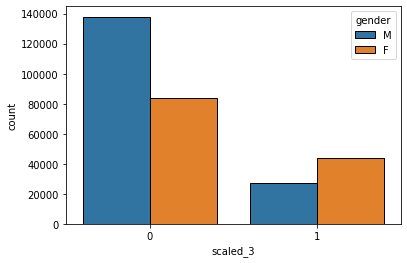

In [88]:
sns.countplot(
    data=df_19[df_19['score_3']!=0],
    x="scaled_3",
    hue="gender",
    edgecolor='black'
);

### Workout 19.4

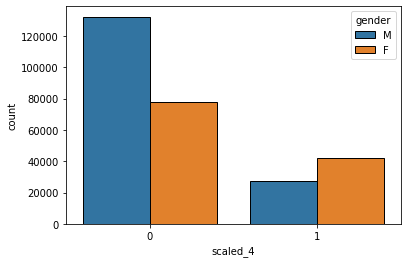

In [89]:
sns.countplot(
    data=df_19[df_19['score_4']!=0],
    x="scaled_4",
    hue="gender",
    edgecolor='black'
);

### Workout 19.5

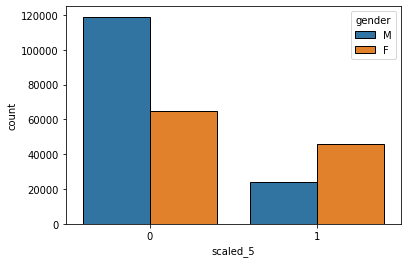

In [90]:
sns.countplot(
    data=df_19[df_19['score_5']!=0],
    x="scaled_5",
    hue="gender",
    edgecolor='black'
);